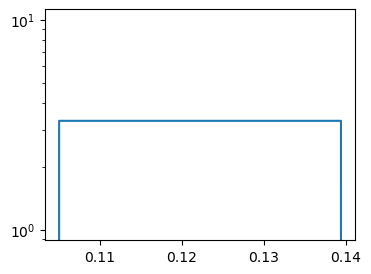

array([      -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf, 3.30225743, 3.30225743, 3.30225743,
       3.30225743, 3.30225743, 3.30225743, 3.30225743, 3.30225743,
       3.30225743, 3.30225743, 3.30225743, 3.30225743, 3.30225743,
       3.30225743, 3.30225743, 3.30225743, 3.30225743, 3.30225743,
             -inf,       -inf,       -inf,       -inf,       -

In [81]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


priors = {}

priors['omega_cdm'] = stats.uniform(loc=0.1032, scale=0.140-0.1032)
dist = priors['omega_cdm']

# samples = priors['omega_cdm'].rvs()

fig, ax = plt.subplots(figsize=(4, 3))

xval = np.linspace(0, 0.2, 100)
# ax.plot(xval, dist.pdf(xval))
ax.plot(xval, dist.logpdf(xval))
ax.set_yscale('log')
plt.show()

dist.logpdf(xval)

In [24]:
from sunbird.inference.priors import Yuan23, AbacusSummit

priors = {**AbacusSummit().prior, **Yuan23().prior}

priors['omega_cdm'].sample('omega_cdm')

TypeError: JAX encountered invalid PRNG key data: expected key_data to have ndim, shape, and dtype attributes. Got omega_cdm

Loaded LHC with shape: (8500, 20), (8500, 800)
Loaded covariance with shape: (800, 800)


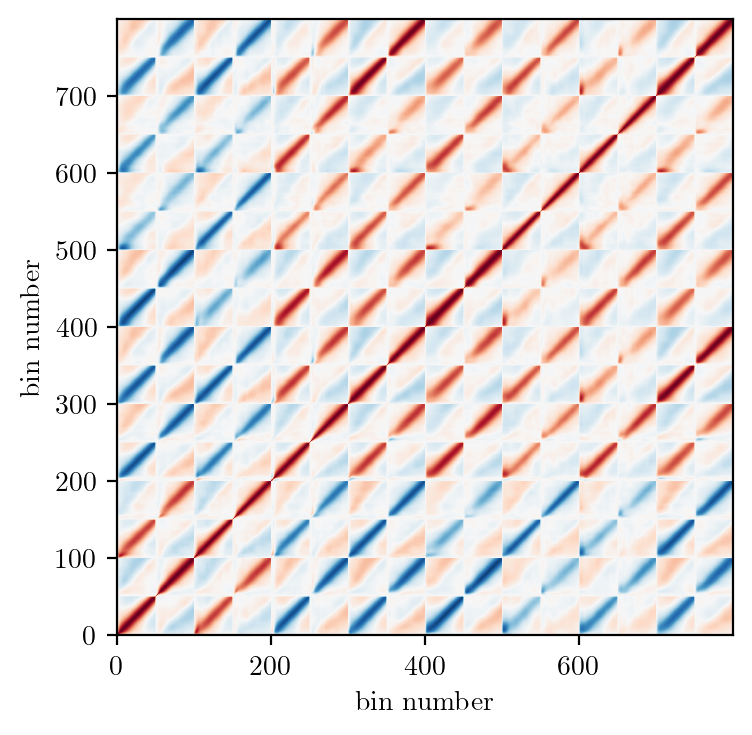

[ 0.02242   0.1134    0.776779  0.9638    0.        2.0328   -1.
  0.       12.85285  14.90241  -2.42158   0.83564   0.32788   0.39661
  1.18575   0.31171   0.27019  -0.96064   0.05306  -0.79937 ]


In [9]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
from sunbird.emulators import FCN
import torch
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_lhc(statistic='dsc_conf', return_sep=False):
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/dsc_conf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'{statistic}_lhc.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    lhc_x = data['lhc_x']
    lhc_x_names = data['lhc_x_names']
    lhc_y = data['lhc_y']
    s = data['s']
    if return_sep:
        return s, lhc_x, lhc_y, lhc_x_names
    return lhc_x, lhc_y

def read_covariance():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/dsc_conf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'dsc_conf_lhc.npy'
    y = np.load(data_fn, allow_pickle=True).item()['cov_y']
    prefactor = 1 / 64
    cov = prefactor * np.cov(y, rowvar=False)
    corr = np.corrcoef(y, rowvar=False)
    return cov, corr

covariance_matrix, correlation_matrix = read_covariance()
s, lhc_x, lhc_y, lhc_x_names = read_lhc(return_sep=True)
print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')
print(f'Loaded covariance with shape: {covariance_matrix.shape}')

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(correlation_matrix, origin='lower', cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xlabel('bin number')
ax.set_ylabel('bin number')
plt.show()

# mask outliers
# mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
# mask = np.all(~mask, axis=1)
# lhc_x = lhc_x[mask]
# lhc_y = lhc_y[mask]
# print(f'After sigma clipping: {lhc_x.shape}, {lhc_y.shape}')

print(lhc_x[199])

Removed no burn in
[[ 0.02263343  0.11574878  0.73608278 ...  0.96221666 -0.0301932
   0.13816173]
 [ 0.02207062  0.11346817  0.755101   ...  0.97190499 -0.01266817
   0.07664522]
 [ 0.02389704  0.115844    0.72432049 ...  0.96611147 -0.06312992
   0.16654703]
 ...
 [ 0.02400154  0.12182094  0.77842726 ... -0.81783366 -0.19817818
  -0.84549753]
 [ 0.02402039  0.12096574  0.84981651 ... -0.40422686 -0.34086786
   0.50872539]
 [ 0.02204701  0.12047178  0.80765303 ... -0.1881424  -0.28945965
  -0.23129511]]
Removed no burn in
Removed no burn in


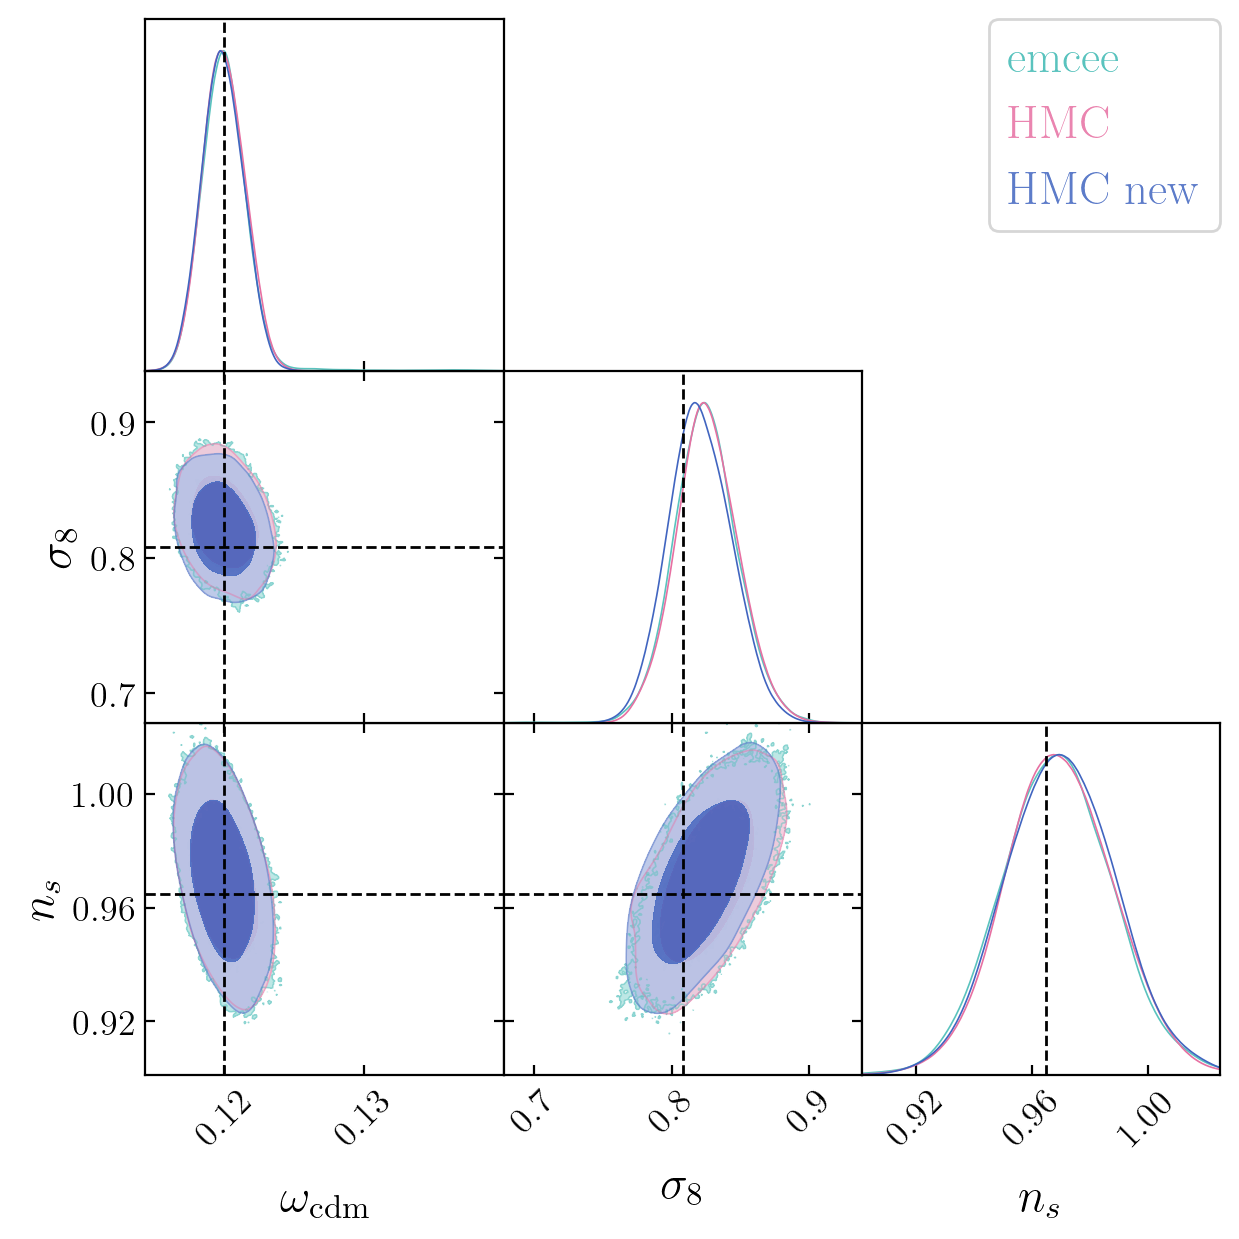

In [121]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 30
smin = 0
kmin, kmax = 0.0, 1.0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['omega_cdm', 'sigma8_m', 'n_s']
statistics = ['tpcf']

for istat, statistic in enumerate(statistics):
    
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/emcee/{statistic}/'
    data_fn = Path(data_dir) / f'posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax152_kmin{kmin}_kmax{kmax}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'][1000:],
                weights=data['weights'][1000:],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    print(data['samples'])
    chains.append(samples)
    
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{statistic}/'
    data_fn = Path(data_dir) / f'posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax152_kmin{kmin}_kmax{kmax}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)
    
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{statistic}/dense_mass/'
    data_fn = Path(data_dir) / f'chain_idx{hod_idx}_smin{smin:.1f}_smax152.0.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    legend_labels=['emcee', 'HMC', 'HMC new'],
    # legend_labels=[labels_stats[stat] for stat in statistics],
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    filled=True,
    markers=truth,
    params=params,
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

In [95]:
len(samples['omega_cdm'])

32000

Removed no burn in


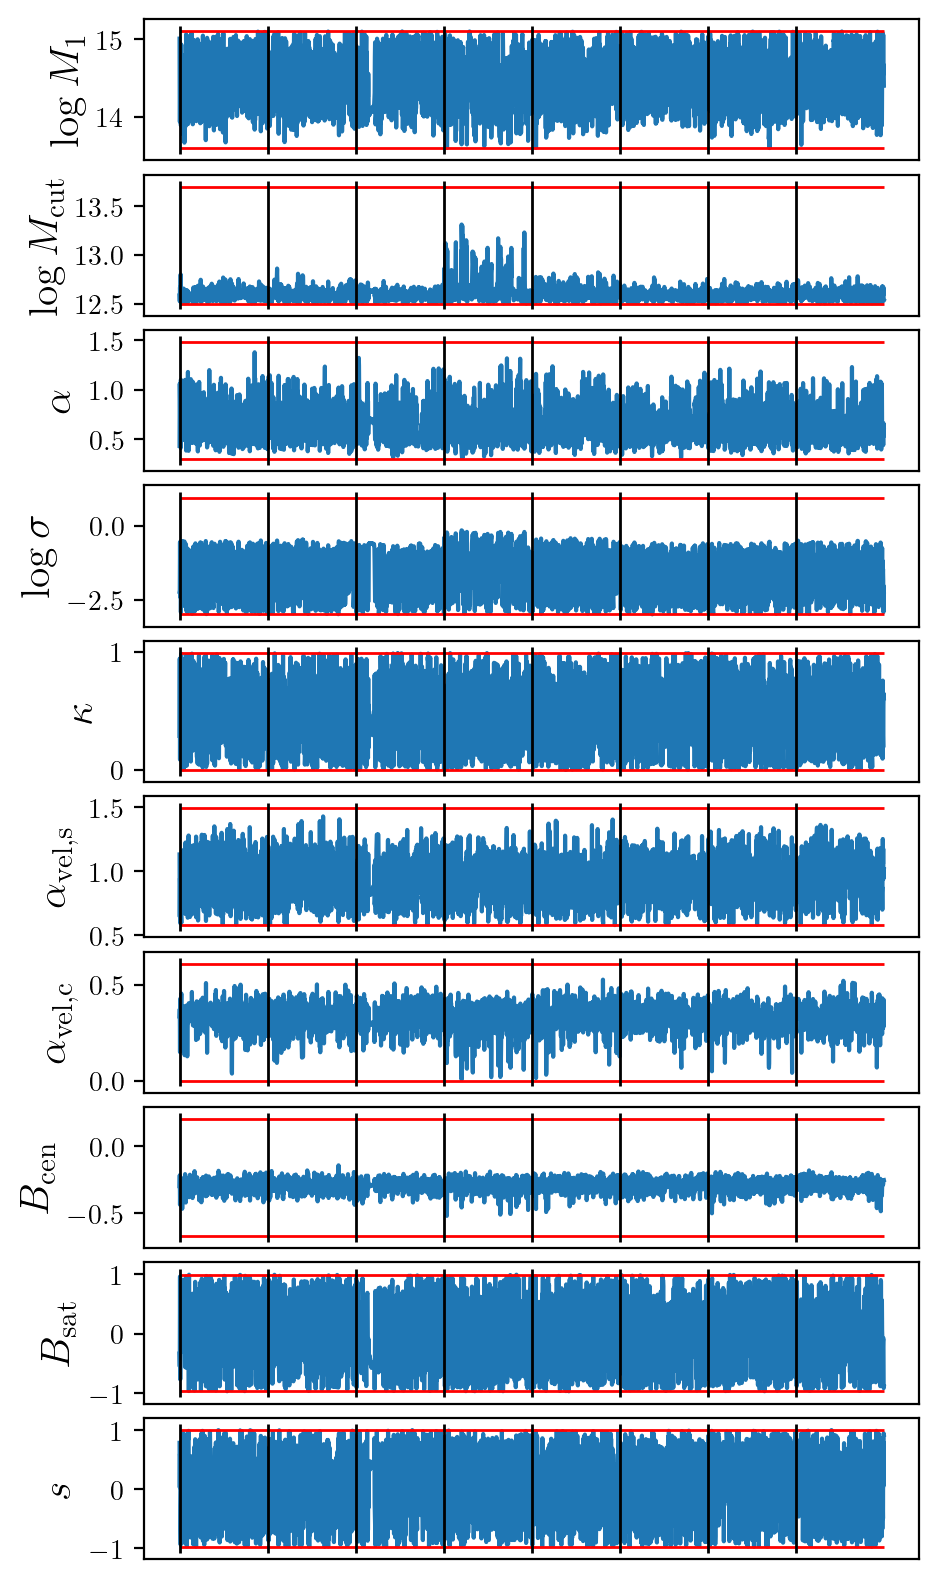

In [123]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 30
smin = 0
kmin, kmax = 0.0, 1.0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['omega_b', 'omega_cdm', 'sigma8_m', 'n_s']
params = ['logM_1', 'logM_cut', 'alpha', 'sigma', 'kappa', 'alpha_s', 'alpha_c', 'B_cen', 'B_sat', 's']
statistics = ['tpcf']

for istat, statistic in enumerate(statistics):
    
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{statistic}/dense_mass/'
    data_fn = Path(data_dir) / f'chain_idx{hod_idx}_smin{smin:.1f}_smax152.0.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'][::10],
                weights=data['weights'][::10],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)
    
    fig, ax = plt.subplots(len(params), 1, figsize=(5, len(params)))
    for i, param in enumerate(params):
        ax[i].plot(np.arange(len(samples[param])), samples[param])
        ax[i].hlines(samples.ranges.getLower(param), 0, len(samples[param]), color='r', lw=1.0)
        ax[i].hlines(samples.ranges.getUpper(param), 0, len(samples[param]), color='r', lw=1.0)
        label = '$' + samples.parLabel(param) + '$'
        ax[i].set_ylabel(label, fontsize=15)
        ax[i].axes.get_xaxis().set_visible(False)
        ylim = ax[i].get_ylim()
        for j in range(8):
            ax[i].vlines(j*400, *ylim, color='k', lw=1.0)
    plt.subplots_adjust(hspace=0.1)
    plt.show()

In [108]:
samples.

14

Removed no burn in


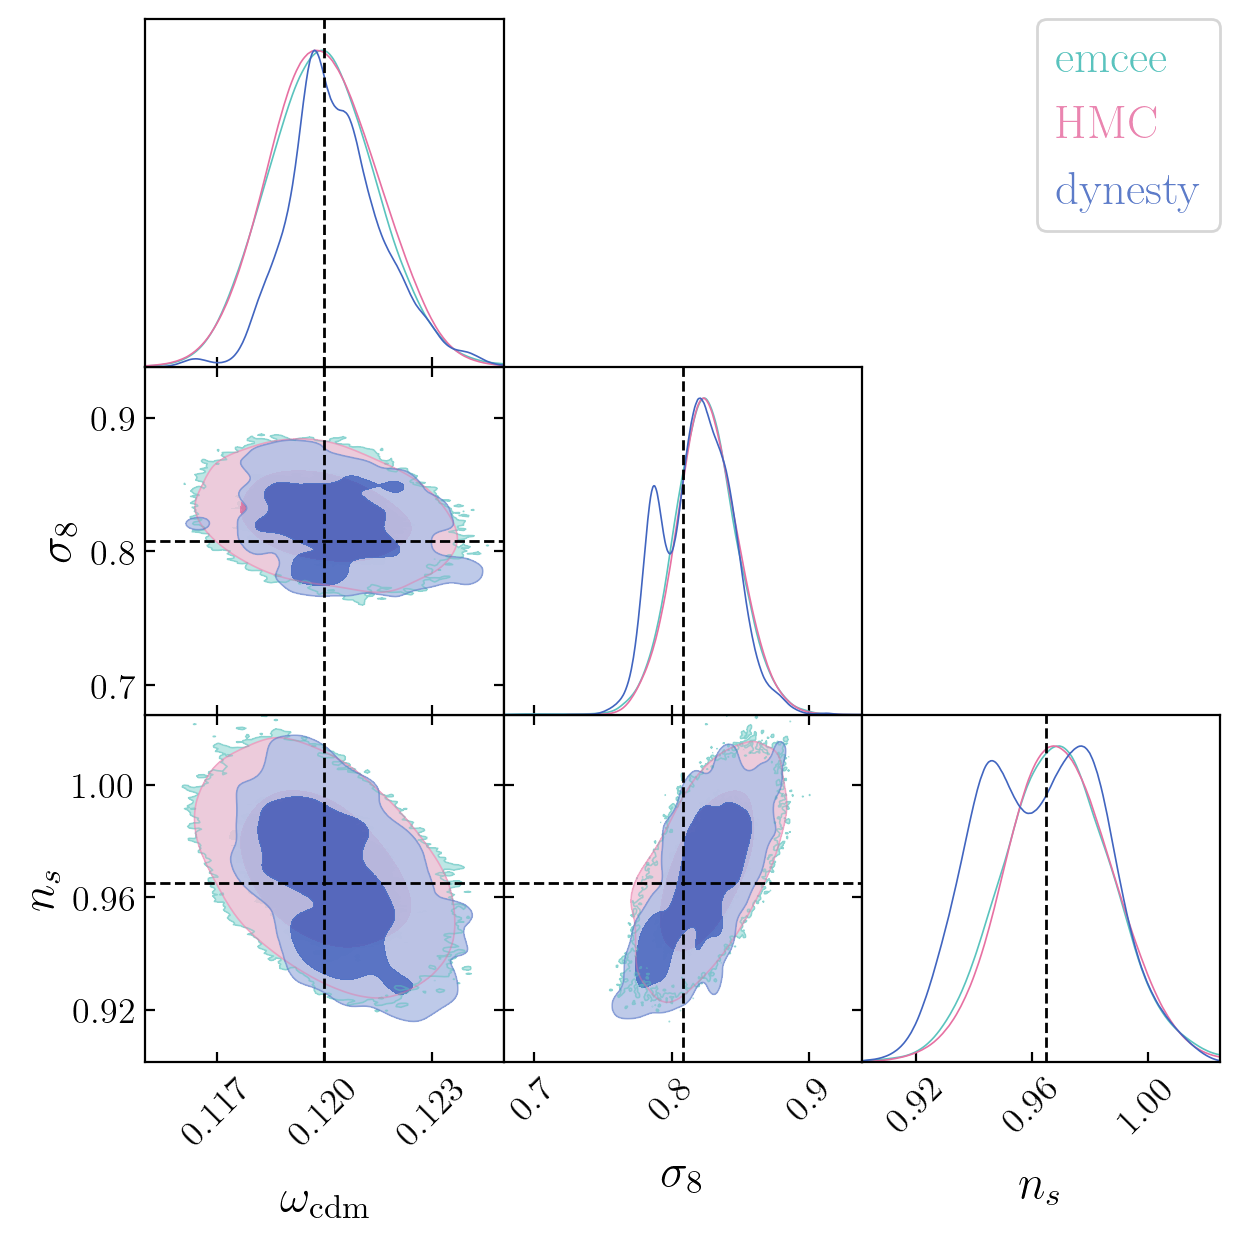

In [30]:
import numpy as np
from getdist import plots, MCSamples
%matplotlib inline

def read_dynesty_chain(filename):
    data = np.genfromtxt(filename, skip_header=1, delimiter=",")                                                                                                                
    chain = data[:, 4:]
    weights = np.exp(data[:, 1] - data[-1, 2])
    return chain, weights

names = [
    'omega_b',
    'omega_cdm',
    'sigma8_m',
    'n_s',
    'logM_cut',
    'logM1',
    'sigma',
    'alpha',
    'kappa',
    'alpha_c',
    'alpha_s',
    's',
    'A_cen',
    'A_sat',
    'B_cen',
    'B_sat'
]

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM1": r"\log M_1",
    "logM_cut": r"\log M_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "A_cen": r"A_{\rm cen}",
    "A_sat": r"A_{\rm sat}",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "s": r"$s$",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}

ranges = {
    'omega_b': [0.0207, 0.0243],
    'omega_cdm': [0.1032, 0.140],
    'sigma8_m': [0.678, 0.938],
    'n_s': [0.9012, 1.025],
    'nrun': [-0.038, 0.038],
    'N_ur': [1.188, 2.889],
    'w0_fld': [-1.22, -0.726],
    'wa_fld': [-0.628, 0.621],
    'logM_cut': [12.5, 13.7],
    'logM_1': [13.6, 15.1],
    'sigma': [-2.99, 0.96],
    'alpha': [0.3, 1.48],
    'kappa': [0., 0.99],
    'alpha_c': [0., 0.61],
    'alpha_s': [0.58, 1.49],
    's': [-0.98, 1.],
    'A_cen': [-0.99, 0.93],                                                                                                                                                                  
    'A_sat': [-1., 1.],
    'B_cen': [-0.67, 0.2],
    'B_sat': [-0.97, 0.99],
}

hod_idx = 30
params = ['omega_cdm', 'sigma8_m', 'n_s']
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
# smins = [80, 60, 40, 20, 10, 0]
smins = [0]

# chains = []

for smin in smins:
    
    chain_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/nested/tpcf/test/chain_idx30_smin{smin:.1f}_smax152.0.csv'
    chain, weights = read_dynesty_chain(chain_fn)
    samples = MCSamples(samples=chain, weights=weights,
                        labels=[labels[n] for n in names], names=names, ranges=ranges) 
    chains.append(samples)

g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    # legend_labels=smins,
    legend_labels=['emcee', 'HMC', 'dynesty'],
    filled=True,
    markers=truth,
    params=params,
    param_limits={'omega_cdm':[0.115, 0.125]},
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)
# plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in


Removed no burn in


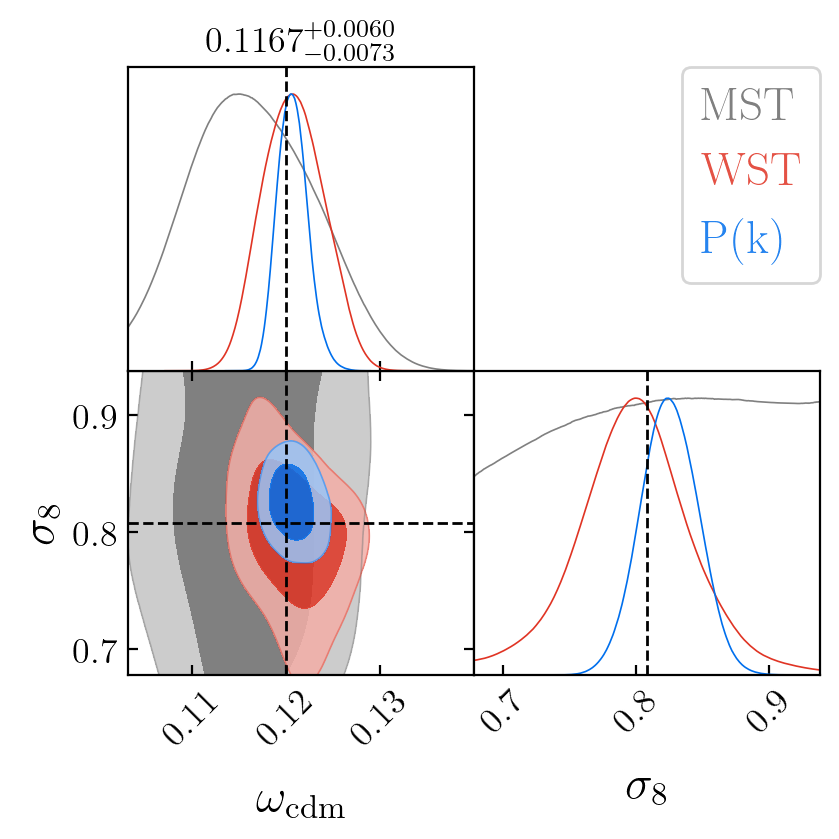

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

# params = ['omega_cdm', 'sigma8_m', 'n_s']
params = ['omega_cdm', 'sigma8_m']
# params = ['B_cen', 'B_sat']

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wp/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Galaxy }w_{p}(r)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/voxel_voids/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Void-galaxy }\xi_{\ell}(s)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.05.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.05$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.10.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.1$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.20.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# print(data['names'])
# legend_labels.append(r'$P(k) k = 0.2$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/mst+number_density/base/'
data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{MST}$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst+number_density/base/'
data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{WST}$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base/'
data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{P(k)}$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base_w0/'
# data_fn = Path(data_dir) / f'chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy'
# print(data_fn)
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['param_names'],
#             ranges=data['param_ranges'],
#             labels=[data['param_labels'][n] for n in data['param_names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Galaxy }P(k)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst+dsc_fourier+number_density/base_w0/'
# data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy"
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['param_names'],
#             ranges=data['param_ranges'],
#             labels=[data['param_labels'][n] for n in data['param_names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{WST + DSC}$')


# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst/oct3/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Wavelet Scattering}$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst/emulator_errorx0.25/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Wavelet Scattering 1/4 emu error}$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30_k0.0_k0.5.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Galaxy } P_{\ell}(k)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/tpcf/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30_s0.0_s152.0.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/dsc_conf/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
    
# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/dsc_fourier/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30_k0.0_k0.5.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Density-split } P_{\ell}(k)$')
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

# legend_labels = [r'$w_{\rm p}(r)$',
#           r'$\textrm{voxel voids}$',
#           r'$\textrm{WST}$',
#           r'$P_{\ell}(k)$',
#           r'$\xi_{\ell}(s)$',
#           r'$\xi^{\rm DS}_{\ell}(s)$',
#           r'$P^{\rm DS}_{\ell}(k)$',
#          ]
          
g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=data['true_params'],
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

['B_cen' 'B_sat' 'alpha' 'alpha_c' 'alpha_s' 'kappa' 'logM_1' 'logM_cut'
 'n_s' 'omega_b' 'omega_cdm' 's' 'sigma' 'sigma8_m']


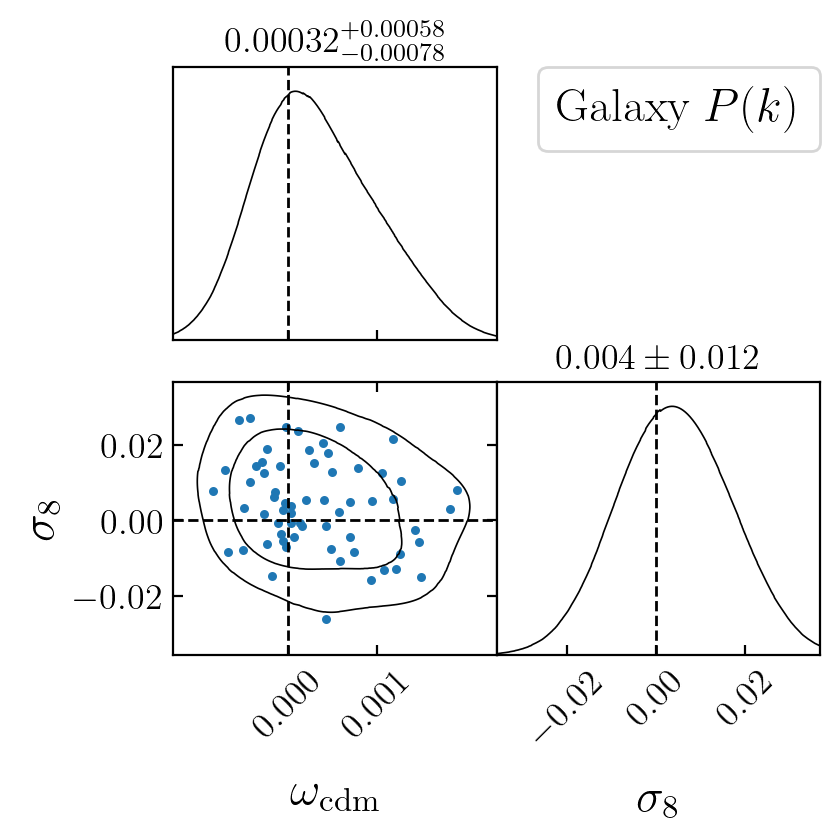

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import getdist
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

getdist.chains.print_load_details = False

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)
samples_global = []

params = ['omega_cdm', 'sigma8_m']
# params = ['B_cen', 'B_sat']

# fig, ax = plt.subplots(figsize=(4, 3))


data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct11/'
for data_fn in list(Path(data_dir).glob('chain_cosmo-idx*_hod-idx*_k0.00-0.50.npy')):
    # print(data_fn)
    data = np.load(data_fn, allow_pickle=True).item()
    
    for key, value in data['param_ranges'].items():
        data['param_ranges'][key] = value - data['true_params'][key]
    
    data['samples'] -= [data['true_params'][name] for name in data['param_names']]
    
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['param_names'],
                ranges=data['param_ranges'],
                labels=[data['param_labels'][n] for n in data['param_names']],
            )
    
    try:
        assert samples.std('omega_cdm') > 0
    except:
        continue
        
    if np.abs(samples.mean('omega_cdm')) > 0.01: continue
    
    samples_global.append(samples.mean(list(data['param_names'])))
    
    chains.append(samples)
    legend_labels.append(r'$\textrm{Galaxy }P(k)$')
        
    # ax.scatter(samples.mean('omega_cdm'), samples.mean('sigma8_m'), marker='o', color='dodgerblue')
    # ax.scatter(samples.mean('B_cen'), samples.mean('B_sat'), marker='o', color='dodgerblue')
    
# xlims, ylims = ax.get_xlim(), ax.get_ylim()
# ax.plot(xlims, [0, 0], ls='--', color='grey')
# ax.plot([0, 0], ylims, ls='--', color='grey')
    
# ax.set_xlabel(r'$\omega_{\rm cdm}$', fontsize=15)
# ax.set_ylabel(r'$\sigma_8$', fontsize=15)
# # ax.set_xlabel(r'$B_{\rm cen}$', fontsize=15)
# # ax.set_ylabel(r'$B_{\rm sat}$', fontsize=15)
# plt.show()

samples_global = np.asarray(samples_global)
chain = MCSamples(
            samples=samples_global,
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )

print(data['param_names'])

g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]

g.triangle_plot(
    roots=chain,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=dict(zip(data['true_params'], np.zeros(len(data['true_params'])))),
    params=params,
    filled=False,
    # filled=[False, True, True, True, True],
    title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

idx = [np.where(data['param_names'] == i)[0] for i in params]

g.fig.axes[0].scatter(samples_global[:, idx[0]], samples_global[:, idx[1]], s=5.0, zorder=1)
plt.show()

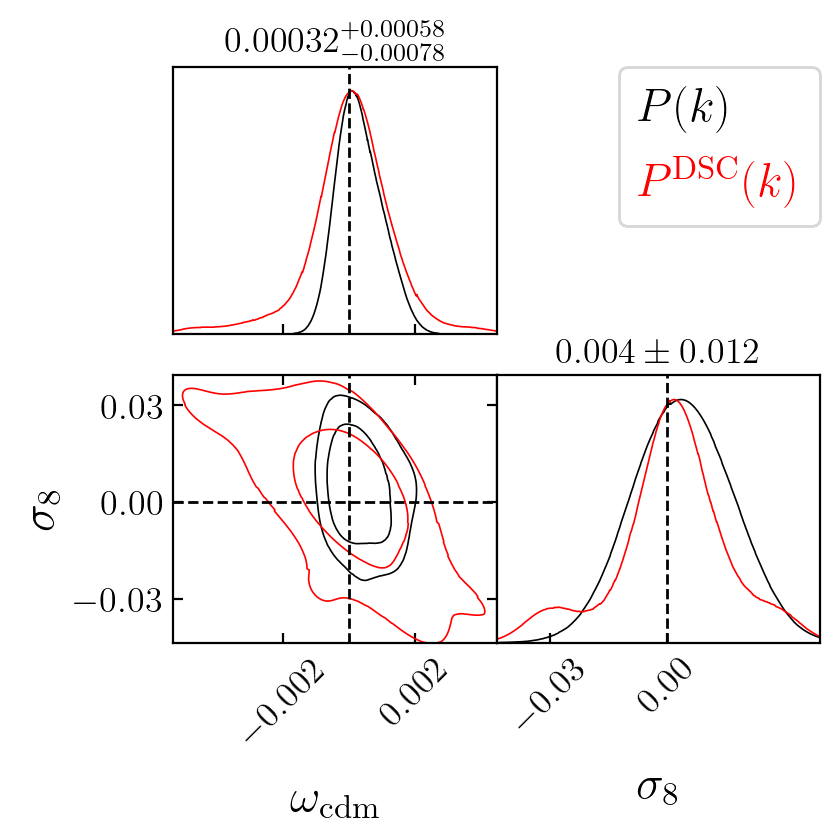

In [14]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import getdist
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

getdist.chains.print_load_details = False

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains_stats = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)
samples_global = []

params = ['omega_cdm', 'sigma8_m']
# params = ['B_cen', 'B_sat']


for stat in ['pk+number_density', 'dsc_fourier+number_density']:

    samples = []
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{stat}/oct11/'
    for data_fn in list(Path(data_dir).glob('chain_cosmo-idx*_hod-idx*_k0.00-0.50.npy')):
        data = np.load(data_fn, allow_pickle=True).item()

        for key, value in data['param_ranges'].items():
            data['param_ranges'][key] = value - data['true_params'][key]

        data['samples'] -= [data['true_params'][name] for name in data['param_names']]

        mcsamples = MCSamples(
                    samples=data['samples'],
                    weights=data['weights'],
                    names=data['param_names'],
                    ranges=data['param_ranges'],
                    labels=[data['param_labels'][n] for n in data['param_names']],
                )
        try:
            assert mcsamples.std('omega_cdm') > 0
        except:
            continue

        if np.abs(mcsamples.mean('omega_cdm')) > 0.01: continue
        samples.append(mcsamples.mean(list(data['param_names'])))
        
    samples = np.asarray(samples)
    chain = MCSamples(
            samples=samples,
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
    )
    chains_stats.append(chain)

    
legend_labels.append(r'$P(k)$')
legend_labels.append(r'$P^{\rm DSC}(k)$')

g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]

g.triangle_plot(
    roots=chains_stats,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=dict(zip(data['true_params'], np.zeros(len(data['true_params'])))),
    params=params,
    filled=False,
    # filled=[False, True, True, True, True],
    title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats,
    # param_limits={'omega_cdm': [-0.005, 0.005], 'sigma8_m': [-0.05, 0.05]}
)

# idx = [np.where(data['param_names'] == i)[0] for i in params]

# g.fig.axes[0].scatter(samples_global[:, idx[0]], samples_global[:, idx[1]], s=5.0, zorder=1)
plt.show()

/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base_w0/chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy
Removed no burn in
Removed no burn in


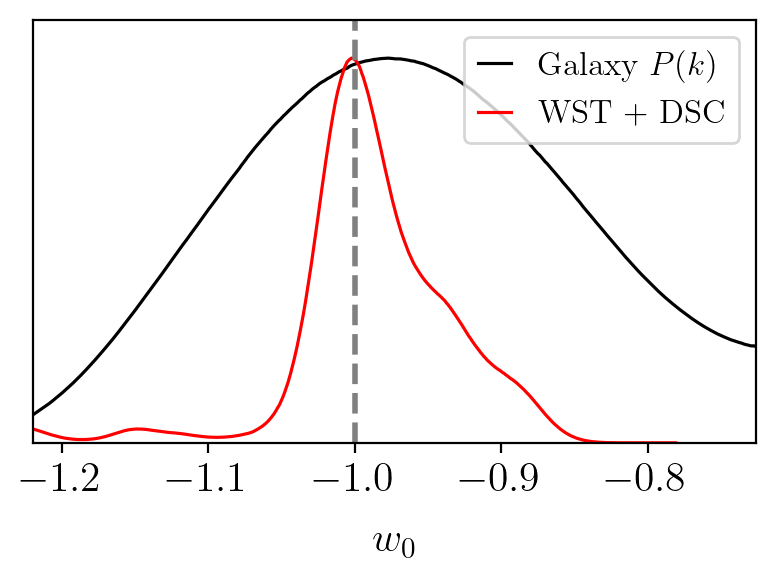

In [46]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

# params = ['omega_cdm', 'sigma8_m', 'n_s']
params = ['w0_fld']
# params = ['B_cen', 'B_sat']

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wp/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Galaxy }w_{p}(r)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/voxel_voids/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Void-galaxy }\xi_{\ell}(s)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.05.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.05$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.10.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.1$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.20.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# print(data['names'])
# legend_labels.append(r'$P(k) k = 0.2$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base_w0/'
data_fn = Path(data_dir) / f'chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy'
print(data_fn)
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{Galaxy }P(k)$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst+dsc_fourier+number_density/base_w0/'
data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{WST + DSC}$')



    
    
g = plots.get_single_plotter(width_inch=4)
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 15
g.plot_1d(chains, 'w0_fld',
             legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=dict(zip(data['true_params'], np.zeros(len(data['true_params'])))),)
          
g.add_legend(legend_labels, legend_loc='upper right', facecolor='w', handlelength=1.0)
g.add_x_marker(data['true_params']['w0_fld'], lw=2.0)
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base_Nur/chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy
Removed no burn in
Removed no burn in


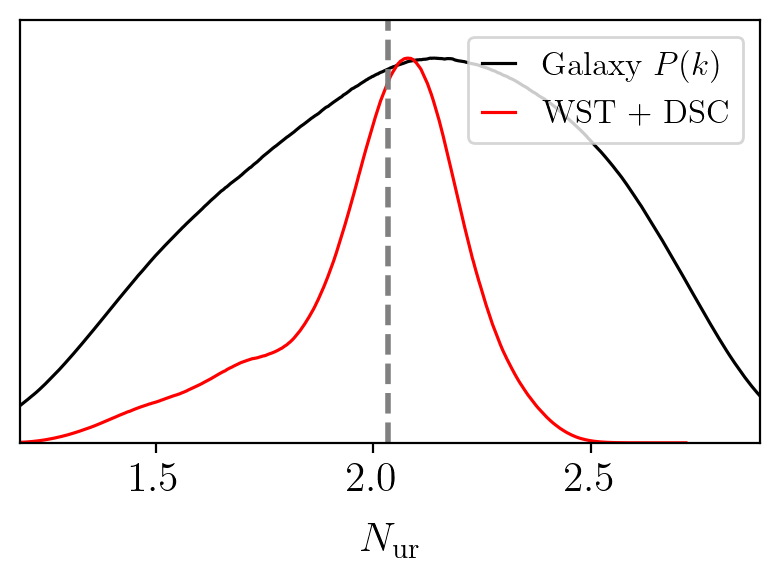

In [45]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

# params = ['omega_cdm', 'sigma8_m', 'n_s']
params = ['N_ur']
# params = ['B_cen', 'B_sat']

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wp/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Galaxy }w_{p}(r)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/voxel_voids/dense_mass/'
# data_fn = Path(data_dir) / f'chain_idx30.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$\textrm{Void-galaxy }\xi_{\ell}(s)$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.05.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.05$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.10.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# legend_labels.append(r'$P(k) k = 0.1$')

# data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/oct9/'
# data_fn = Path(data_dir) / f'chain_cosmo_idx0_hod_idx30_k0.00_k0.20.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# samples = MCSamples(
#             samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[data['labels'][n] for n in data['names']],
#         )
# chains.append(samples)
# print(data['names'])
# legend_labels.append(r'$P(k) k = 0.2$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/pk+number_density/base_Nur/'
data_fn = Path(data_dir) / f'chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy'
print(data_fn)
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{Galaxy }P(k)$')

data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/wst+dsc_fourier+number_density/base_Nur/'
data_fn = Path(data_dir) / f"chain_cosmo-idx0_hod-idx30_k0.00-0.50.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['param_names'],
            ranges=data['param_ranges'],
            labels=[data['param_labels'][n] for n in data['param_names']],
        )
chains.append(samples)
legend_labels.append(r'$\textrm{WST + DSC}$')



    
    
g = plots.get_single_plotter(width_inch=4)
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 15
g.plot_1d(chains, 'N_ur',
             legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=dict(zip(data['true_params'], np.zeros(len(data['true_params'])))))
          
g.add_legend(legend_labels, legend_loc='upper right', facecolor='w', handlelength=1.0)
g.add_x_marker(data['true_params']['N_ur'], lw=2.0)
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

# params = ['omega_cdm', 'sigma8_m', 'n_s']
params = ['omega_b', 'omega_cdm', 'sigma8_m', 'n_s']
# params = ['B_cen', 'B_sat']

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"pdf_r20_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{CIC r20}$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"pdf_r10_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{CIC r10}$')


markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

print(data['names'])
        
ndim = len(params)
finished = []
ax_idx = 0
for i, param1 in enumerate(params):
    for j, param2 in enumerate(params[::-1]):
        # if i <= j:
            # continue
        if param2 in finished: continue
        # print(param1, param2, i, j, ax_idx, data['names'].index(param1))
        if param1 != param2:
            g.fig.axes[ax_idx].plot(maxl[data['names'].index(param1)],
                                    maxl[data['names'].index(param2)],
                                    marker='*', ms=10.0, color='k', mew=1.0, mfc='w')
        ax_idx += 1
    finished.append(param1)
# g.fig.axes[1].plot(maxl[1], maxl[2], marker='*', ms=10.0, color='k')
# g.fig.axes[3].plot(maxl[2], maxl[3], marker='*', ms=10.0, color='k')
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm/pdf_r20_chain.npy'

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
['omega_b', 'omega_cdm', 'sigma8_m', 'n_s', 'logM_cut', 'logM_1', 'sigma', 'alpha', 'kappa', 'alpha_c', 'alpha_s', 's', 'A_cen', 'A_sat', 'B_cen', 'B_sat']


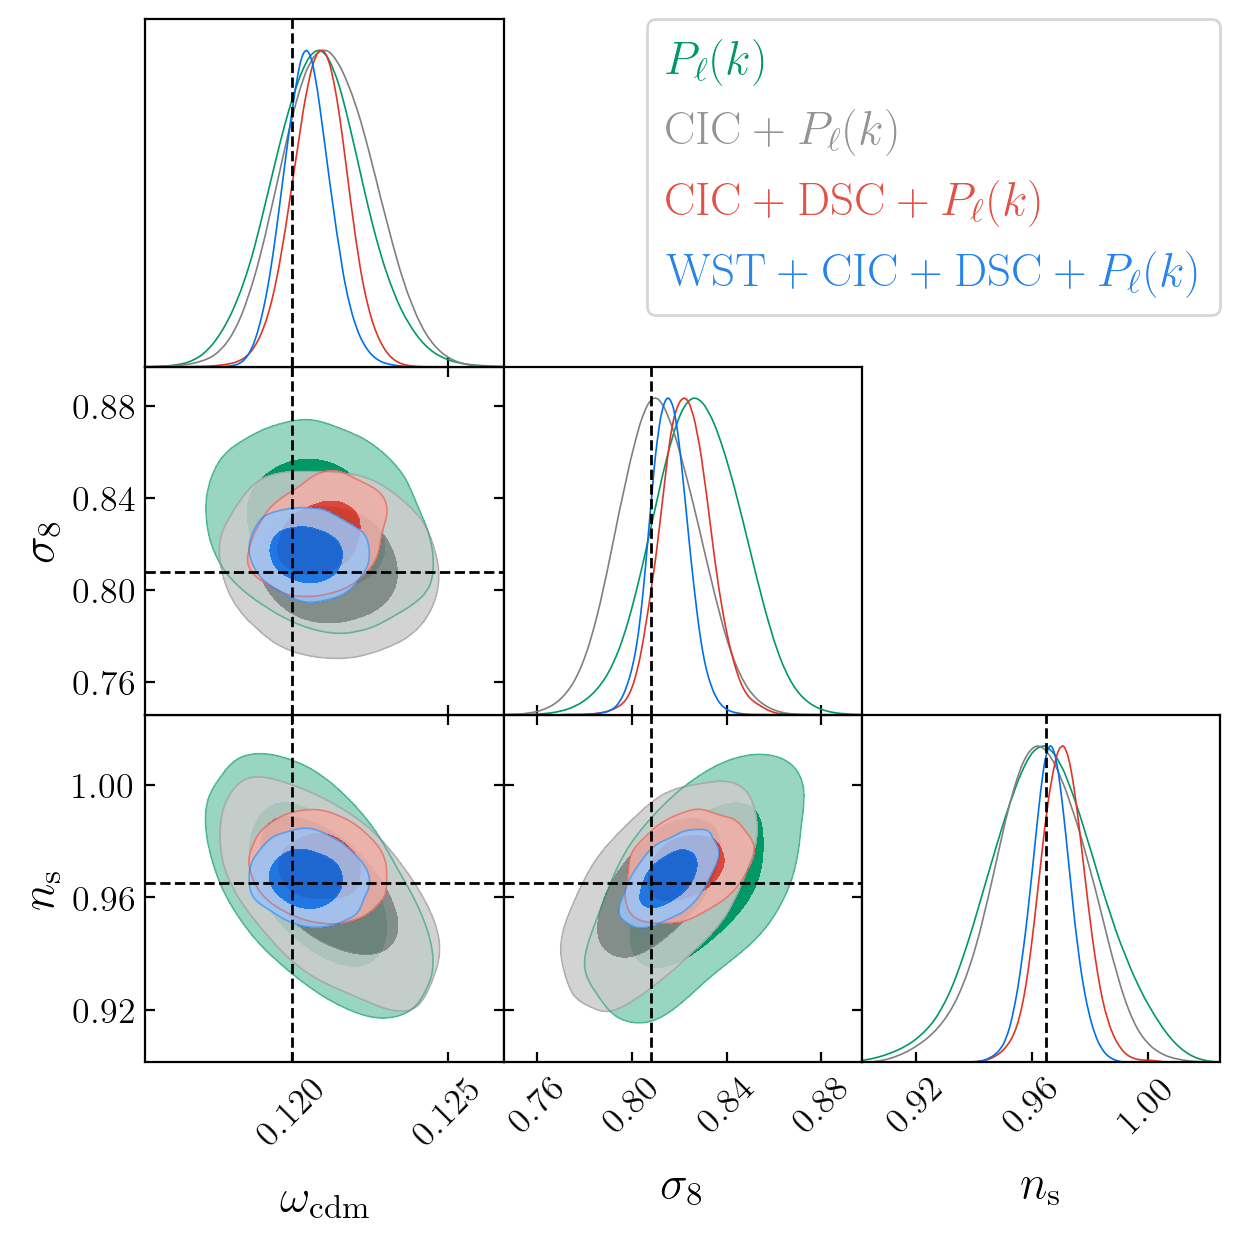

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['A_cen', 'A_sat', 'B_cen', 'B_sat']

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$P_\ell(k)$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"pdf+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{CIC} + P_\ell(k)$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"dsc_fourier+pdf+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{CIC} + \textrm{DSC} + P_\ell(k)$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"wst+dsc_fourier+pdf+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{WST} + \textrm{CIC} + \textrm{DSC} + P_\ell(k)$')


markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

print(data['names'])
        
# ndim = len(params)
# finished = []
# ax_idx = 0
# for i, param1 in enumerate(params):
#     for j, param2 in enumerate(params[::-1]):
#         # if i <= j:
#             # continue
#         if param2 in finished: continue
#         # print(param1, param2, i, j, ax_idx, data['names'].index(param1))
#         if param1 != param2:
#             g.fig.axes[ax_idx].plot(maxl[data['names'].index(param1)],
#                                     maxl[data['names'].index(param2)],
#                                     marker='*', ms=10.0, color='k', mew=1.0, mfc='w')
#         ax_idx += 1
#     finished.append(param1)
# g.fig.axes[1].plot(maxl[1], maxl[2], marker='*', ms=10.0, color='k')
# g.fig.axes[3].plot(maxl[2], maxl[3], marker='*', ms=10.0, color='k')
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in


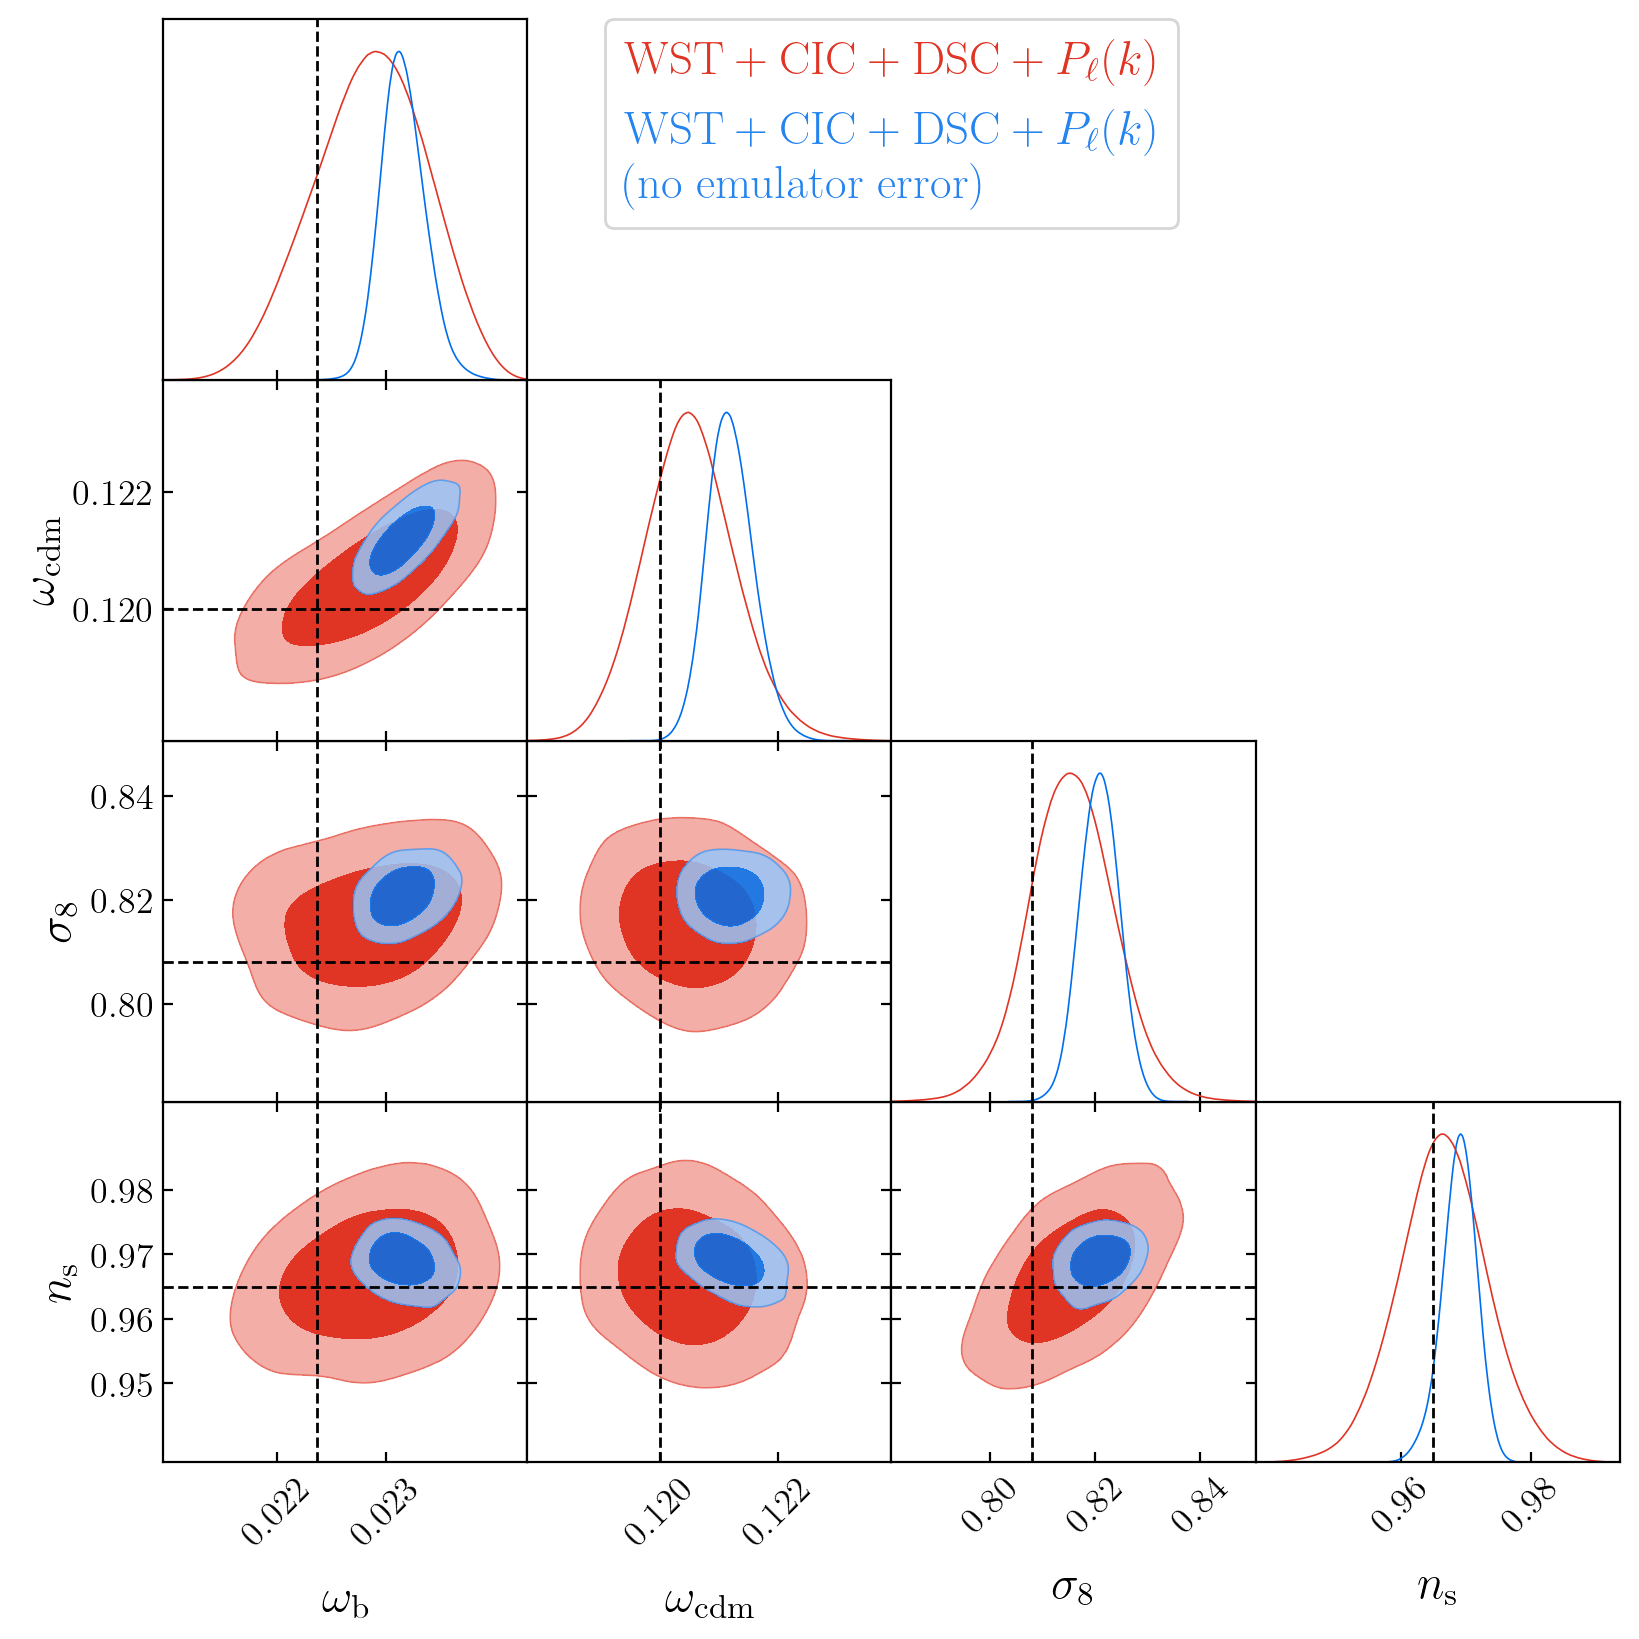

In [20]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

# params = ['omega_cdm', 'sigma8_m', 'n_s']
params = ['omega_b', 'omega_cdm', 'sigma8_m', 'n_s']
# params = ['B_cen', 'B_sat']

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm'
data_fn = Path(data_dir) / f"wst+dsc_fourier+pdf+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{WST} + \textrm{CIC} + \textrm{DSC} + P_\ell(k)$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod30/base_lcdm/no_emulator_error'
data_fn = Path(data_dir) / f"wst+dsc_fourier+pdf+pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{WST} + \textrm{CIC} + \textrm{DSC} + P_\ell(k)$''\n(no emulator error)')


markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

# print(data['names'])
        
# ndim = len(params)
# finished = []
# ax_idx = 0
# for i, param1 in enumerate(params):
#     for j, param2 in enumerate(params[::-1]):
#         # if i <= j:
#             # continue
#         if param2 in finished: continue
#         # print(param1, param2, i, j, ax_idx, data['names'].index(param1))
#         if param1 != param2:
#             g.fig.axes[ax_idx].plot(maxl[data['names'].index(param1)],
#                                     maxl[data['names'].index(param2)],
#                                     marker='*', ms=10.0, color='k', mew=1.0, mfc='w')
#         ax_idx += 1
#     finished.append(param1)
# g.fig.axes[1].plot(maxl[1], maxl[2], marker='*', ms=10.0, color='k')
# g.fig.axes[3].plot(maxl[2], maxl[3], marker='*', ms=10.0, color='k')
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
['omega_b', 'omega_cdm', 'sigma8_m', 'n_s', 'logM_cut', 'logM_1', 'sigma', 'alpha', 'kappa', 'alpha_c', 'alpha_s', 's', 'A_cen', 'A_sat', 'B_cen', 'B_sat']


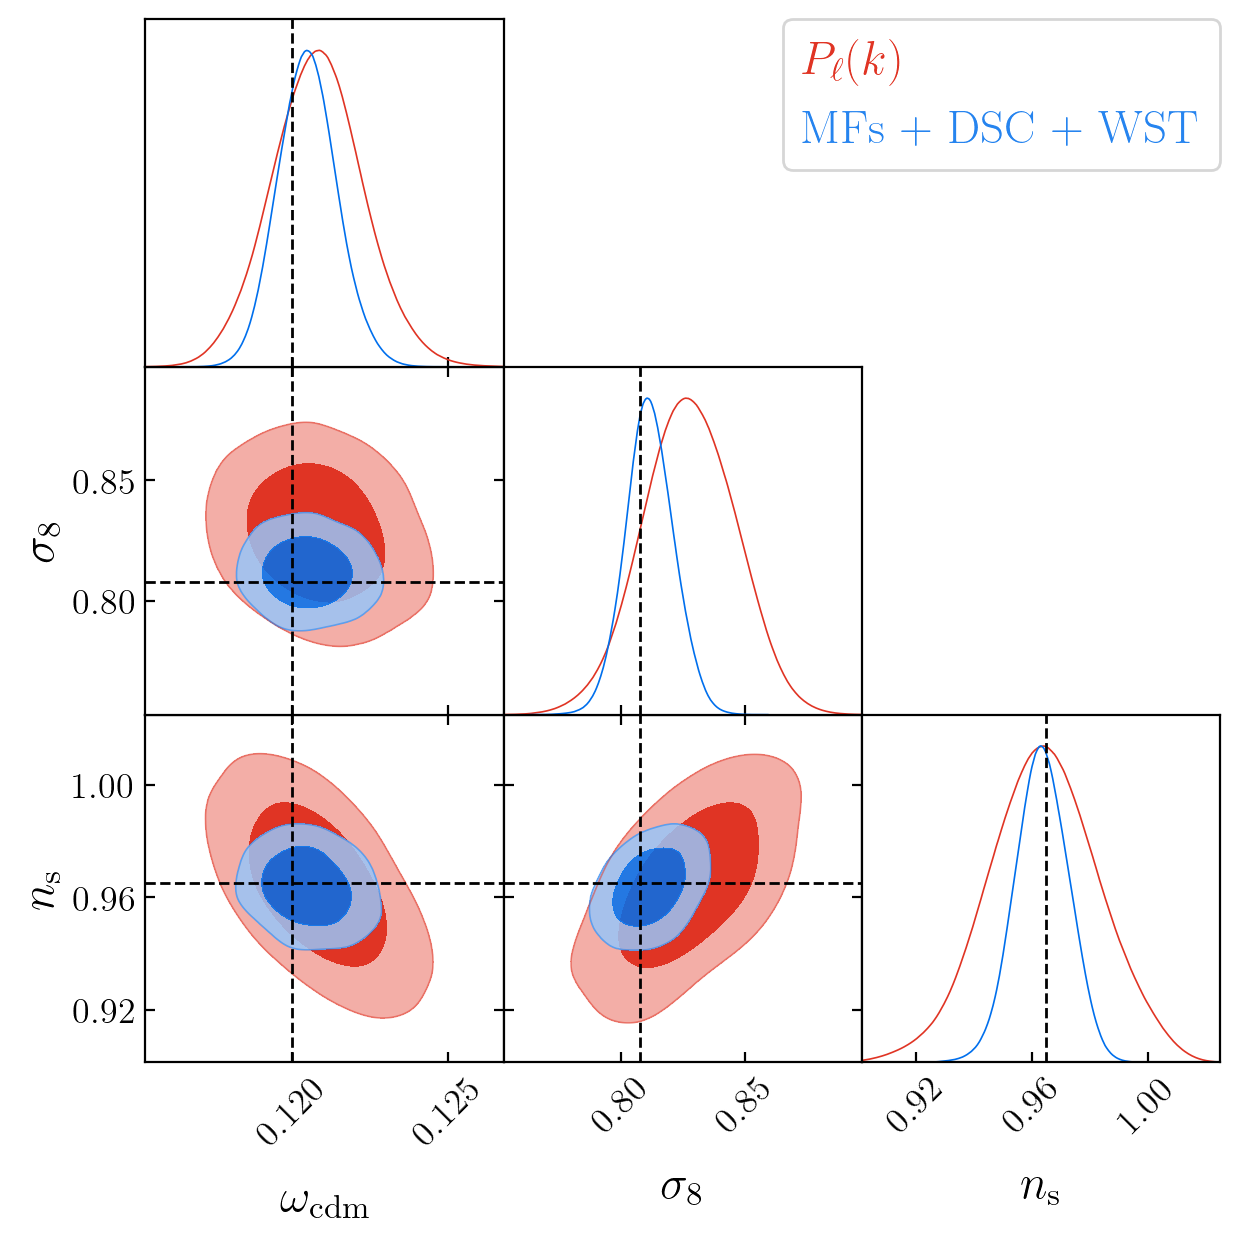

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['A_cen', 'A_sat', 'B_cen', 'B_sat']

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod030/base_lcdm'
data_fn = Path(data_dir) / f"pk+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$P_\ell(k)$')

data_dir = f'/global/cfs/cdirs/desicollab/users/epaillas/acm/fits_emc/abacus/c000_hod030/base_lcdm'
data_fn = Path(data_dir) / f"wst+dsc_pk+minkowski+number_density_k0.00-0.50_chain.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$\textrm{MFs + DSC + WST}$')


markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)

print(data['names'])
        
# ndim = len(params)
# finished = []
# ax_idx = 0
# for i, param1 in enumerate(params):
#     for j, param2 in enumerate(params[::-1]):
#         # if i <= j:
#             # continue
#         if param2 in finished: continue
#         # print(param1, param2, i, j, ax_idx, data['names'].index(param1))
#         if param1 != param2:
#             g.fig.axes[ax_idx].plot(maxl[data['names'].index(param1)],
#                                     maxl[data['names'].index(param2)],
#                                     marker='*', ms=10.0, color='k', mew=1.0, mfc='w')
#         ax_idx += 1
#     finished.append(param1)
# g.fig.axes[1].plot(maxl[1], maxl[2], marker='*', ms=10.0, color='k')
# g.fig.axes[3].plot(maxl[2], maxl[3], marker='*', ms=10.0, color='k')
plt.show()
# # plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# # plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')